Kmeans   
- we try to select the centroid by calculating the mean of datapoints
k-medoids  
- selects datapoints from the given dataset

Disadvantages  
- affect by outliers
- choosing the no of clusters
- fails to recognize patterns

Heirarchial Clustering
- 2 methods
    - Agglomerative method(bottomup approach)
    - divisive(topdown appoach)
- Agglomerative method(bottomup approach)
    - linkage methods
        - single linkage(calculates the distance b/w closest members of the two clusters)
        - complete linkage(calculates the distance b/w farthest members of the two clusters)
        - average linkage(distance b/w all pairs and calculates the average of all these distances)
    - variance methods(ward)
    - centroids methods   
***Agglomerative method***
- each object as a cluster
- merge two clusters which are similar untill all objects are merged into a single cluster   
***Divisive method***   
- all objects stay in one cluster
- select a cluster and divide to subclusters   
***Dendogram***
- a binary tree like structure that shows how clusters are merged/splitted heirachically   
***Single Linkage***
- sensitive to outliers
- can find irregular shaped clusters   
***Complete and average linkage***
- robust to outliers
- break large clusters(spherical clusters)  
***choosing optimal value of k from the dendogram***
- choose the largest vertical distance without crossing any horizontal line


In [4]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Clustering/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
x=df.iloc[:,[2,3]]
x

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


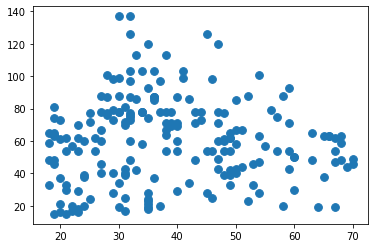

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df["Age"],df["Annual Income (k$)"],s=60)

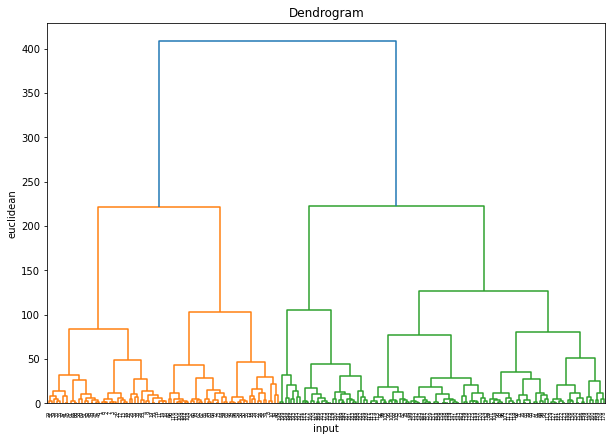

In [13]:
import scipy.cluster.hierarchy as dg
plt.figure(figsize=(10,7))
dendrogram=dg.dendrogram(dg.linkage(x,method="ward"))
plt.title("Dendrogram")
plt.xlabel("input")
plt.ylabel("euclidean")
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage="ward")
pred=model.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(x,pred)

0.4104652474372429

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


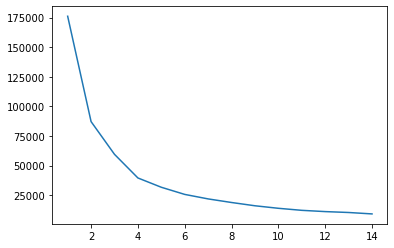

In [32]:
from sklearn.cluster import KMeans
l=[]
k=range(1,15)
for i in k:
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(x)
    l.append(model.inertia_)
plt.plot(k,l)

In [36]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4,random_state=42)
model.fit(x)
y_pred=model.predict(x)
silhouette_score(x,y_pred)

0.43295184273333076

In [37]:
#scaling the data
from sklearn.preprocessing import normalize
x_scale=normalize(x)
x_scale

array([[0.78488277, 0.61964429],
       [0.81373347, 0.58123819],
       [0.78086881, 0.62469505],
       [0.8209052 , 0.57106449],
       [0.87681241, 0.48083261],
       [0.791285  , 0.6114475 ],
       [0.8892878 , 0.45734801],
       [0.787505  , 0.61630826],
       [0.95864687, 0.28459829],
       [0.84481908, 0.53505208],
       [0.96206393, 0.2728241 ],
       [0.87885343, 0.47709186],
       [0.94537298, 0.32599068],
       [0.76822128, 0.6401844 ],
       [0.87970651, 0.47551703],
       [0.73994007, 0.67267279],
       [0.85749293, 0.51449576],
       [0.68965517, 0.72413793],
       [0.91453534, 0.40450601],
       [0.83570548, 0.54917789],
       [0.82472885, 0.56552836],
       [0.72138732, 0.69253183],
       [0.87862451, 0.47751332],
       [0.77841304, 0.62775245],
       [0.88775453, 0.46031716],
       [0.71940146, 0.69459451],
       [0.8490566 , 0.52830189],
       [0.78086881, 0.62469505],
       [0.80961044, 0.58696757],
       [0.62139471, 0.78349768],
       [0.

In [39]:
scale_data=pd.DataFrame(x_scale)
scale_data

,0,1
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833
...,...,...
195,0.280000,0.960000
196,0.336336,0.941742
197,0.246154,0.969231
198,0.227454,0.973789


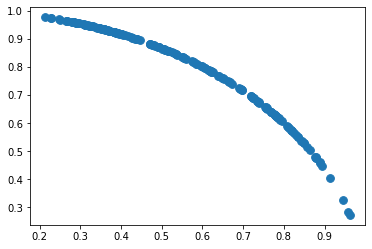

In [41]:
import matplotlib.pyplot as plt
plt.scatter(scale_data[0],scale_data[1],s=60)

In [42]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage="ward")
pred=model.fit_predict(x_scale)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [43]:
silhouette_score(x_scale,pred)

0.6332340091836156

In [44]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [58]:
x=df.iloc[:,[2,3]]
x=x.values
x

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

In [59]:
x1=x[pred==0,0]
y1=x[pred==0,1]

In [60]:
x2=x[pred==1,0]
y2=x[pred==1,1]

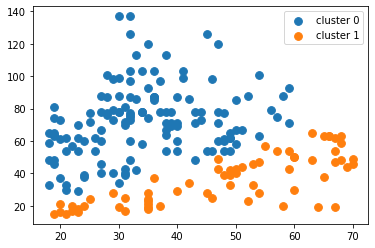

In [62]:
plt.scatter(x1,y1,s=60,label="cluster 0")
plt.scatter(x2,y2,s=60,label="cluster 1")
plt.legend()
plt.show()